NOTE*
This will need to become a google colab link that I can send to the professor.

<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<h3>(2) Come up with a market and plot a supply and demand curve for that market.</h3>

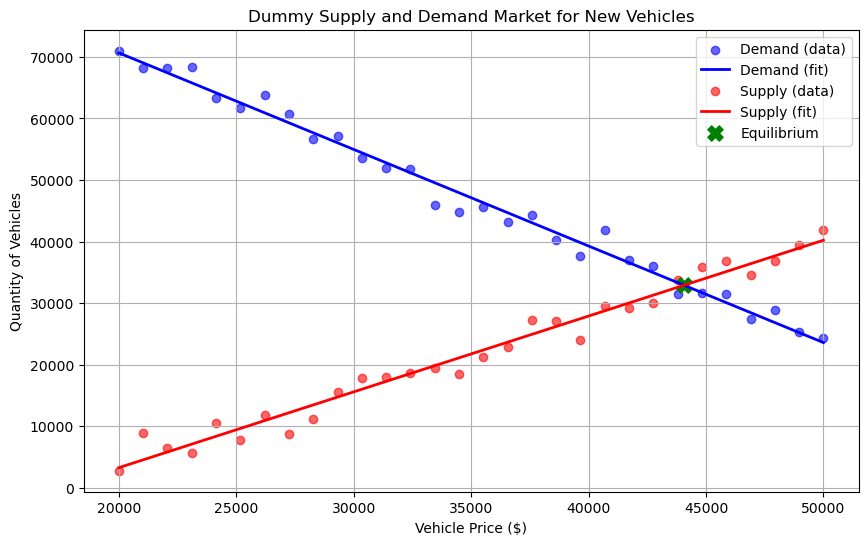

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1998.
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.39e-27
Time:                        13:56:28   Log-Likelihood:                -265.04
No. Observations:                  30   AIC:                             534.1
Df Residuals:                      28   BIC:                             536.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.02e+05   1267.231     80.492      0.0

In [4]:
# (2) Come up with a market and plot a supply and demand curve for that market.
# demand captures consumer behavior
# supply captures producer behavior

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 30)  # price of new vehicles

# Demand curve: as price rises, demand falls
true_demand = 100000 - 1.5 * prices  # base linear relation
demand = true_demand + np.random.normal(0, 2000, size=prices.shape)  # add noise

# Supply curve: as price rises, supply increases
true_supply = -20000 + 1.2 * prices
supply = true_supply + np.random.normal(0, 2000, size=prices.shape)

# Fit linear regression models for demand and supply
X = prices.reshape(-1, 1)

lin_demand = LinearRegression().fit(X, demand)
lin_supply = LinearRegression().fit(X, supply)

# Predict fitted lines
demand_pred = lin_demand.predict(X)
supply_pred = lin_supply.predict(X)

# Use statsmodels for extra detail on demand
X_sm = sm.add_constant(prices)
model_demand_sm = sm.OLS(demand, X_sm).fit()

# ---- Find Equilibrium Point ----
# Demand: Qd = a_d + b_d * P
# Supply: Qs = a_s + b_s * P
a_d, b_d = lin_demand.intercept_, lin_demand.coef_[0]
a_s, b_s = lin_supply.intercept_, lin_supply.coef_[0]

# Solve for P* where Qd = Qs
# a_d + b_d*P = a_s + b_s*P
P_eq = (a_s - a_d) / (b_d - b_s)
Q_eq = a_d + b_d * P_eq

# Plot supply and demand
plt.figure(figsize=(10,6))
plt.scatter(prices, demand, color="blue", alpha=0.6, label="Demand (data)")
plt.plot(prices, demand_pred, color="blue", linewidth=2, label="Demand (fit)")

plt.scatter(prices, supply, color="red", alpha=0.6, label="Supply (data)")
plt.plot(prices, supply_pred, color="red", linewidth=2, label="Supply (fit)")

# Mark equilibrium point
plt.scatter(P_eq, Q_eq, color="green", s=120, marker="X", label="Equilibrium")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("Dummy Supply and Demand Market for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()

# Print regression summary for demand
print(model_demand_sm.summary())

# Print equilibrium point
print(f"Equilibrium Price: ${P_eq:,.2f}")
print(f"Equilibrium Quantity: {Q_eq:,.0f} vehicles")

<h3>(3) Come up with reasons that the supply and demand curves might shift</h2>

<p>
Starting with supply shifts, a supply curve could shift right due to lower production costs, or maybe innovation in technology. Another good example could be EV incentives.
A real supply shortage occured during Covid-19. Used cars bought 2-3 years ago sold at the same price or more at which they were bought for which is unheard of. This meant that the supply curve shifted left because not as many cars were being produced
A drop in interest rates would also contribute to more auto loans being taken out meaning there would be more demand for cars which would shift the demand curve to the right.
Right now the car market isn't as crazy as it was during Covid-19, so the demand isn't as high as it once was. This means that the demand curve is shifiting left since no one can afford to live.
</p>


<h3>(4) Create a plot with at least five supply curves and at least five demand curves
</h3>

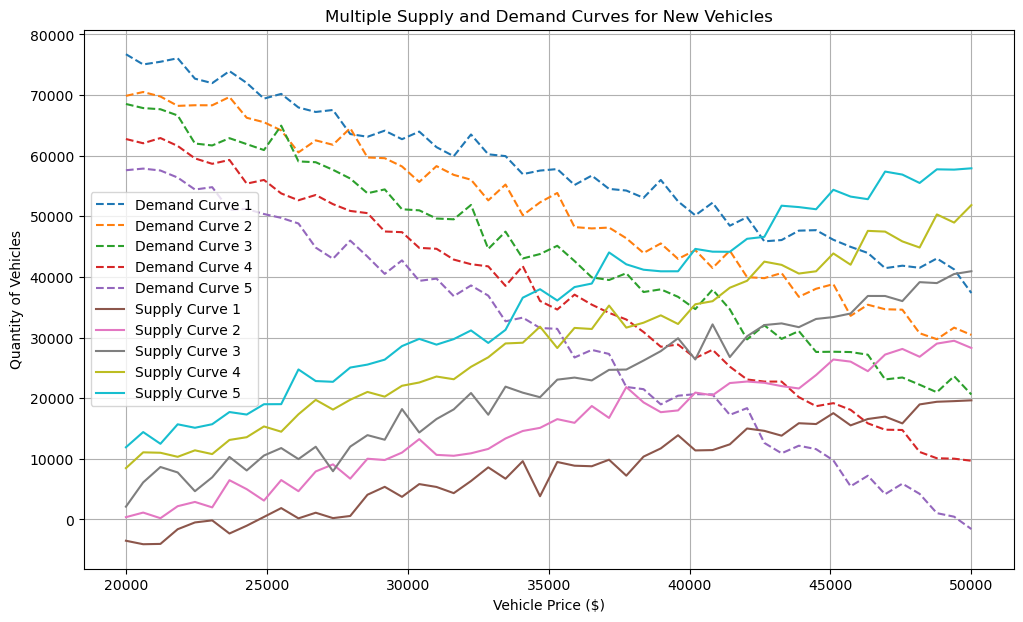

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create multiple demand and supply curves
supply_curves = []
demand_curves = []

for i in range(5):
    # Demand: downward slope with variation
    demand = 100000 - (1.2 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    demand_curves.append(demand)
    
    # Supply: upward slope with variation
    supply = -20000 + (0.8 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# Plot multiple supply and demand curves
plt.figure(figsize=(12, 7))

# Plot demand curves
for i, demand in enumerate(demand_curves, start=1):
    plt.plot(prices, demand, label=f"Demand Curve {i}", linestyle="--")

# Plot supply curves
for i, supply in enumerate(supply_curves, start=1):
    plt.plot(prices, supply, label=f"Supply Curve {i}")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("Multiple Supply and Demand Curves for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()


<h3>(5) Extract a subset of the equilibrium points and plot them with a regression line and display the slope
</h3>

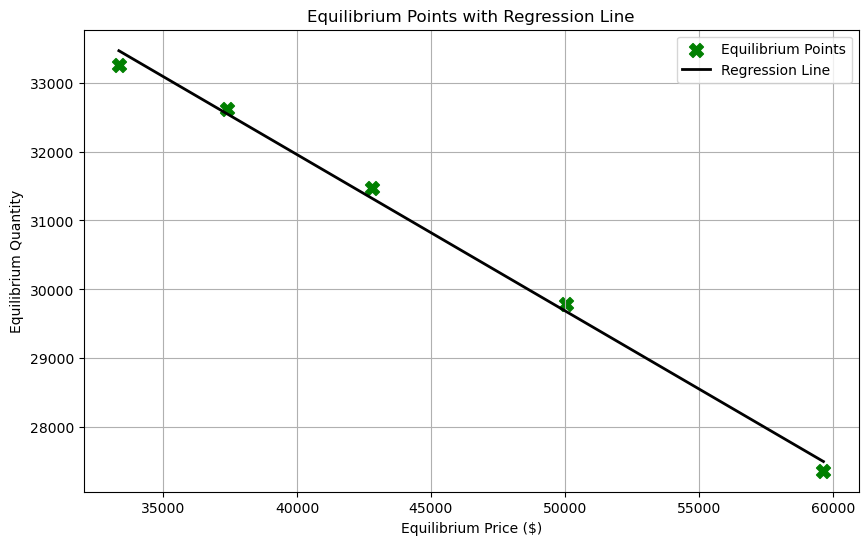

Slope of regression line: -0.2266


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create multiple demand and supply curves
supply_curves = []
demand_curves = []

for i in range(5):
    # Demand: downward slope with variation
    demand = 100000 - (1.2 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    demand_curves.append(demand)
    
    # Supply: upward slope with variation
    supply = -20000 + (0.8 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# ---- Find Equilibrium Points ----
equilibria = []
for i in range(5):
    # Fit demand and supply lines
    lin_demand = LinearRegression().fit(X, demand_curves[i])
    lin_supply = LinearRegression().fit(X, supply_curves[i])
    
    # Extract coefficients
    a_d, b_d = lin_demand.intercept_, lin_demand.coef_[0]
    a_s, b_s = lin_supply.intercept_, lin_supply.coef_[0]
    
    # Solve for equilibrium P and Q
    P_eq = (a_s - a_d) / (b_d - b_s)
    Q_eq = a_d + b_d * P_eq
    equilibria.append((P_eq, Q_eq))

# Convert to numpy array
equilibria = np.array(equilibria)

# Extract subset (all 5 here, but could choose fewer)
subset_eq = equilibria[:5]

# Fit regression line across equilibrium points
X_eq = subset_eq[:,0].reshape(-1,1)  # Prices
y_eq = subset_eq[:,1]                # Quantities
lin_eq = LinearRegression().fit(X_eq, y_eq)
y_pred = lin_eq.predict(X_eq)

# Plot equilibrium points and regression line
plt.figure(figsize=(10,6))
plt.scatter(subset_eq[:,0], subset_eq[:,1], color="green", s=100, marker="X", label="Equilibrium Points")
plt.plot(subset_eq[:,0], y_pred, color="black", linewidth=2, label="Regression Line")

plt.xlabel("Equilibrium Price ($)")
plt.ylabel("Equilibrium Quantity")
plt.title("Equilibrium Points with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

# Display slope of regression line
print(f"Slope of regression line: {lin_eq.coef_[0]:.4f}")


<table border="1">
  <thead>
    <tr>
      <th>Scenario</th>
      <th>Shift</th>
      <th>New Outcome</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Demand increases</td>
      <td>Demand curve shifts right</td>
      <td>Higher price, higher quantity</td>
    </tr>
    <tr>
      <td>Supply increases</td>
      <td>Supply curve shifts right</td>
      <td>Lower price, higher quantity</td>
    </tr>
    <tr>
      <td>Demand decreases</td>
      <td>Demand curve shifts left</td>
      <td>Lower price, lower quantity</td>
    </tr>
    <tr>
      <td>Supply decreases</td>
      <td>Supply curve shifts left</td>
      <td>Higher price, lower quantity</td>
    </tr>
  </tbody>
</table>

<h3>(6) Comment on the meaningfulness of this slope. Can we learn anything about the parameters of supply and demand curves from this data?</h3>
<p>
The slope of the regression points down or is negative meaning that the equilibirum prices are falling. Decreasing price may mean the supply curve is shifting right or the demand curve is shifting left. The market is moving down so there might be a smaller market for this item.
</p>

<h3>(7) Create the plot again, but this time do ten supply curves and one demand curve.
</h3>

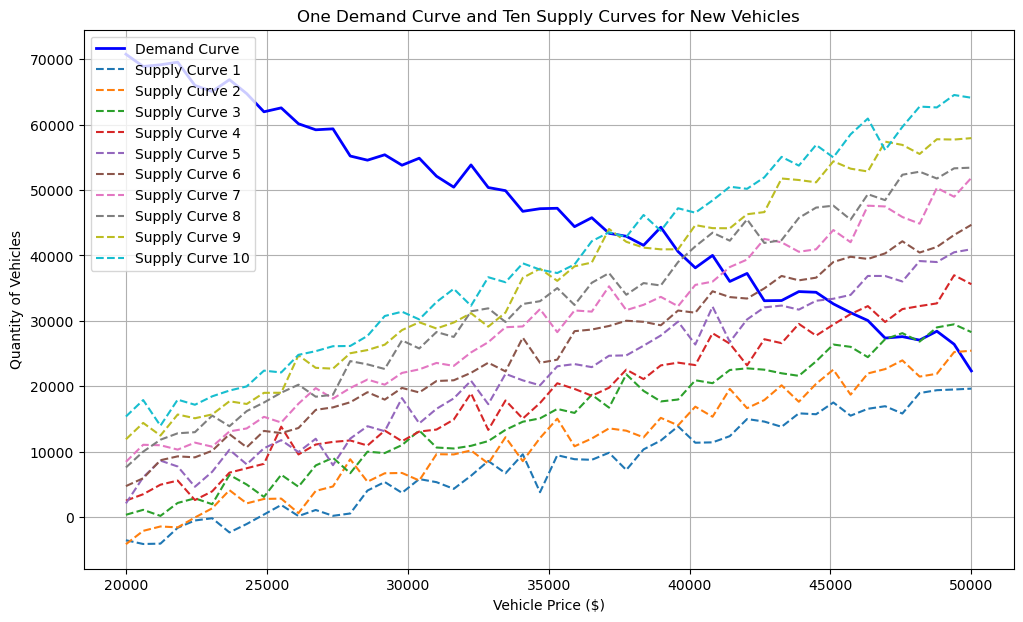

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create one demand curve
demand_curve = 100000 - 1.5 * prices + np.random.normal(0, 1500, size=prices.shape)

# Create multiple supply curves
supply_curves = []
for i in range(10):
    supply = -20000 + (0.8 + 0.1 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# Plot demand curve
plt.figure(figsize=(12, 7))
plt.plot(prices, demand_curve, color="blue", linewidth=2, label="Demand Curve")

# Plot multiple supply curves
for i, supply in enumerate(supply_curves, start=1):
    plt.plot(prices, supply, label=f"Supply Curve {i}", linestyle="--")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("One Demand Curve and Ten Supply Curves for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()


<h3>(8) Create the new scatter plot with the regression line again and comment on the slope. Can we learn anything about the parameters of the supply and demand curves from this data?
</h3>

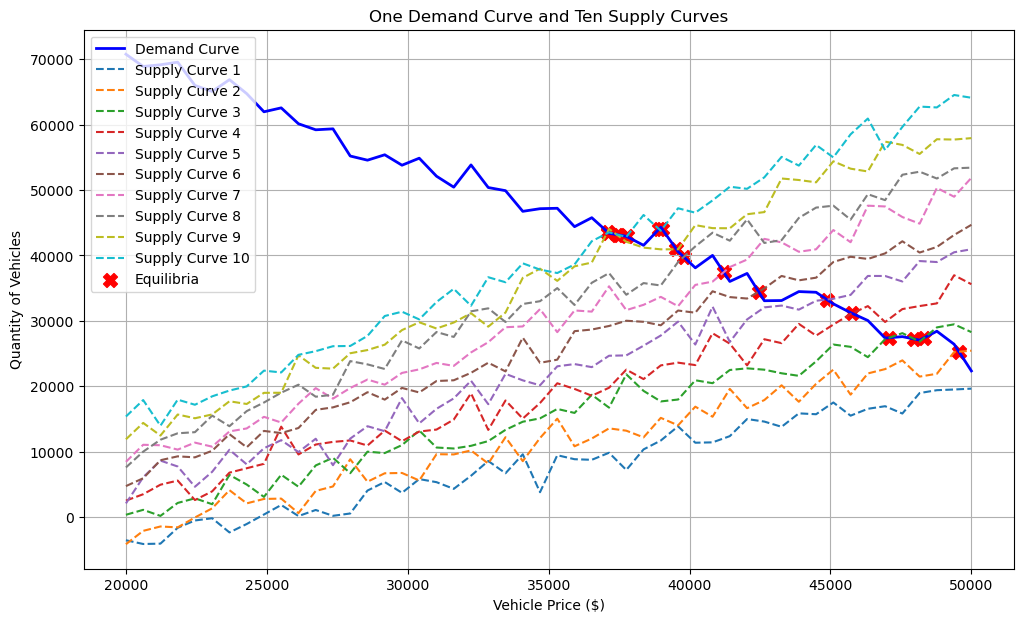

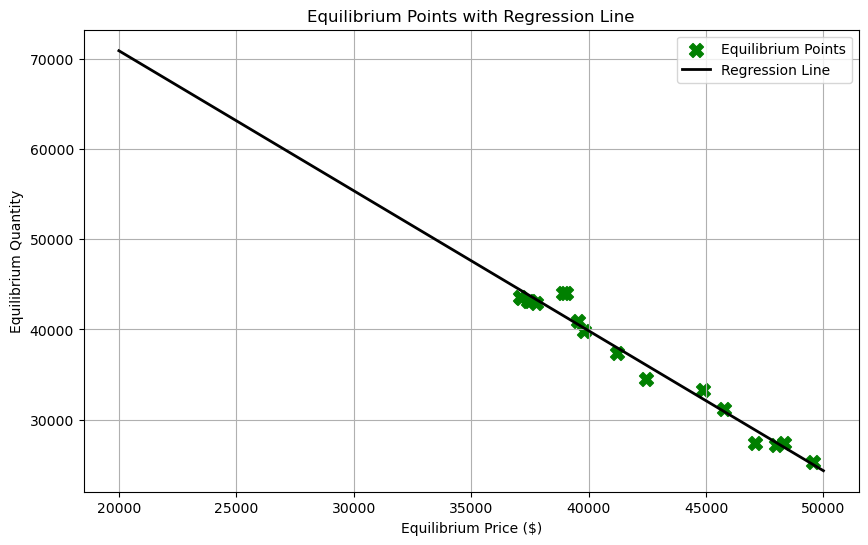

Slope of regression line: -1.5516


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create one demand curve
demand_curve = 100000 - 1.5 * prices + np.random.normal(0, 1500, size=prices.shape)

# Create multiple supply curves
supply_curves = []
for i in range(10):
    supply = -20000 + (0.8 + 0.1 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# ---- Find equilibrium points ----
equilibrium_points = []
for supply in supply_curves:
    diff = demand_curve - supply
    sign_changes = np.where(np.diff(np.sign(diff)))[0]
    for idx in sign_changes:
        # Linear interpolation
        x1, x2 = prices[idx], prices[idx + 1]
        y1_d, y2_d = demand_curve[idx], demand_curve[idx + 1]
        y1_s, y2_s = supply[idx], supply[idx + 1]

        slope_d = (y2_d - y1_d) / (x2 - x1)
        slope_s = (y2_s - y1_s) / (x2 - x1)
        intercept_d = y1_d - slope_d * x1
        intercept_s = y1_s - slope_s * x1

        eq_price = (intercept_s - intercept_d) / (slope_d - slope_s)
        eq_quantity = slope_d * eq_price + intercept_d

        equilibrium_points.append((eq_price, eq_quantity))

equilibrium_points = np.array(equilibrium_points)

# ---- Regression on equilibrium points ----
X_eq = equilibrium_points[:, 0].reshape(-1, 1)  # Prices
y_eq = equilibrium_points[:, 1]                # Quantities

lin_eq = LinearRegression().fit(X_eq, y_eq)
x_fit = np.linspace(prices.min(), prices.max(), 100).reshape(-1, 1)
y_fit = lin_eq.predict(x_fit)

# ---- Plot supply & demand curves ----
plt.figure(figsize=(12, 7))
plt.plot(prices, demand_curve, color="blue", linewidth=2, label="Demand Curve")
for i, supply in enumerate(supply_curves, start=1):
    plt.plot(prices, supply, linestyle="--", label=f"Supply Curve {i}")
plt.scatter(equilibrium_points[:, 0], equilibrium_points[:, 1],
            color="red", marker="X", s=100, label="Equilibria")
plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("One Demand Curve and Ten Supply Curves")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot regression line separately ----
plt.figure(figsize=(10, 6))
plt.scatter(X_eq, y_eq, color="green", s=100, marker="X", label="Equilibrium Points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Regression Line")
plt.xlabel("Equilibrium Price ($)")
plt.ylabel("Equilibrium Quantity")
plt.title("Equilibrium Points with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

# Print slope
print(f"Slope of regression line: {lin_eq.coef_[0]:.4f}")


<h3>
(8) cont... Can we learn anything about the parameters of the supply and demand curves from this data?
</h3>
<p>
This equilibirum slope shows a market trending downward, but most importantly there is only one single demand curve. This means there is only one universal demand curve we're taking into account so this can represent only one facet of the car market. When we had an equal number of demand curves and supply curves it showed many different types of markets. That allows you to analyze many market outcomes vs when we had a single demand curve that represented one universal source of demand.  
</p>
<p>
With one demand curve, or one supply curve we are able to identify their parameters. However, when we have many demand and many supply curves, we can't separate them and identify their parameters without additional info.
</p>

<h3>(9) Suppose you collected data on prices and quantities in your market. What other data might you collect to apply the above logic to estimate the parameters of supply and demand? Explain thoroughly.
</h3>
<p>
I would need to know where the supply and demand markets came from. What I mean by that is was the supply curve data from Toyota or Ford? Also, where was this data collected so that we can label the data as "Toyota Prices and quantity in Europe". This would allow for inference on the supply of Toyota cars in Europe. I can say the same for the demand of Ford trucks in Texas. If I have one demand, and many supply, or many demand and one supply, as long as there is just one I can identify the demand or supply without instruments. I've learned instruments are a variable that are strongly correlated with either a supply, or a demand, and depending on which one used you can use them to identify demand or supply.
</p>

<h3>(10) Write a paragraph about what you learned from this assignment. Use your own words.</h3>
<p>
I had heard of supply and demand before this class but I have never delved into the topic with this level of depth. I've also heard of terms like "surplus" or "shortage" before so it's nice to know textbook definitions of these terms now. I like how economics has an intuitive sense to it and I'm excited for the inference portion of this class. I've used too many black box models and algorithms so it's refreshing to see a basic but powerful linear regression used. Another thing I learned about was that movement can result in a shift and that they're two different things. Demand and supply curves have slopes that are different things from shifts. I thought at first an increase in supply would shift the curve right and increase the slope. However, the slope is unrelated in terms of curve movement and shifts. As a I conversate with AI tools I'm encountering a whole lot of unknown jargon like exogenous supply shifters, instruments, demand shifters, etc... I presume as this course continues I'll learn more on these terms and better understand the jargon used for economics.
</p>